# **WORKFLOW FOR CONTROL DESIGN**

In [1]:
!pip -q install tellurium
!pip -q install controlSBML

In [2]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import controlSBML as ctl
import control
import numpy as np
import matplotlib.pyplot as plt

# 1. Description of the control problem

1. Select a model and load it into Tellurium. Print it in Antimony.
1. Write a short narrative that describes how the problem you’re solving. Specify the output you are controlling and the control objectives. Provide at least 2 control objectives. Examples are: regulate the output for setpoints within the range [a, b]; eliminate oscillations; settling times (convergence to steady state) occurs within 2 sec.



1. Regulate pyruvate.
1. Why? We are regulating input to the Krebs cycle.
1. Control objectives
     1. Achieve a desired target value for pyruvate. 45
     1. Stability
     1. Settling time
     1. Minimize or eliminate oscillations

We will use the model of gycolytic oscillations by J Wolf, BioModels 206.

In [3]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL3352181362/3/BIOMD0000000206_url.xml"
CTLSB = ctl.ControlSBML(URL)
print(CTLSB.getAntimony())  # View the Antimony

// Created by libAntimony v2.15.0
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

# 2. Control description of the system

1. Choose a suitable input to control the system output. Plot a staircase function of the input over the operating region. Specify:
      1. directional effect of the input on the output
      1. operating region for the input
      1. range of outputs that can be achieved (feasible setpoints)
1. Write a short narrative describing how the plot indicates that the control objectives can be achieved over the operating region.

* Input operating region: 30 - 50
* Output achieved: 32 - 50
* Directional effect of input on output: increasing

In [4]:
CTLSB = ctl.ControlSBML(URL, input_name="s1", output_name="s5")

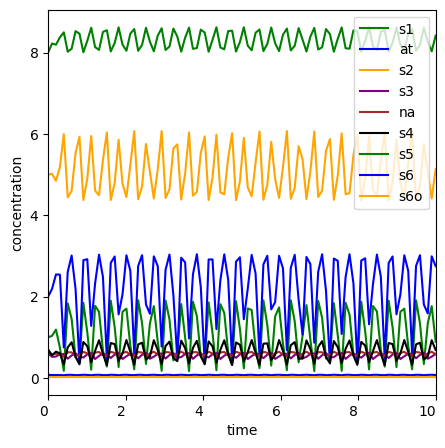

In [5]:
_ = CTLSB.plotModel()

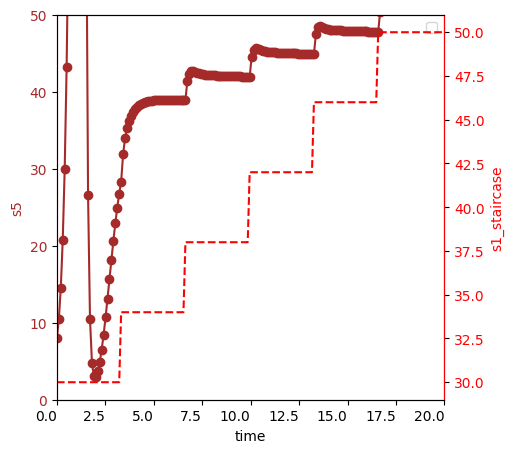

In [6]:
_ = CTLSB.plotStaircaseResponse(initial_value=30, final_value=50,
                            times=np.linspace(0, 20, 200), ylim=[0, 50])

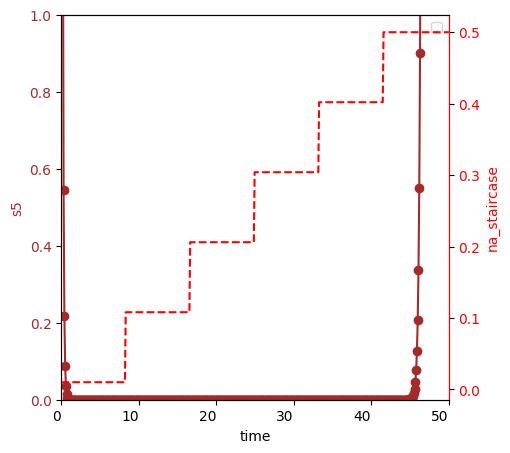

In [7]:
ctlsb = ctl.ControlSBML(URL, input_name="na", output_name="s5")
_ = ctlsb.plotStaircaseResponse(initial_value=.01, final_value=0.5,
                            times=np.linspace(0, 50, 500), ylim=[0, 1])

# 3. Control design

Propose a PID design and evaluate how well it meets your control objectives by plotting the system response.

In [8]:
?CTLSB.plotDesign

100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


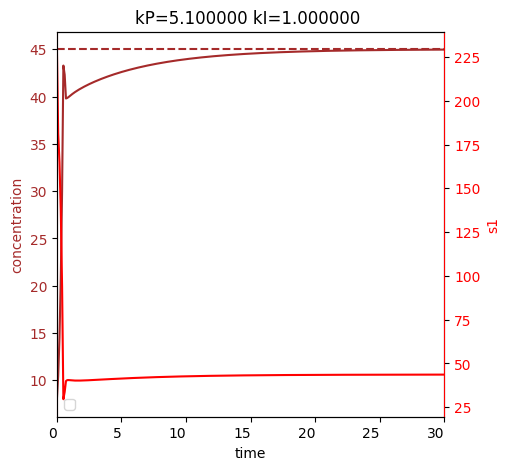

In [9]:
ctlsb = ctl.ControlSBML(URL, input_name="s1", output_name="s5")
_ = ctlsb.plotDesign(setpoint=45, kP_spec=5.1, kI_spec=1, kD_spec=0,
                            times=np.linspace(0, 30, 300))

  0%|          | 0/100 [00:00<?, ?it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  1%|          | 1/100 [00:01<02:44,  1.66s/it]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.608938 and h = 2.92225e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  3%|▎         | 3/100 [00:02<00:55,  1.76it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.583248 and h = 7.83695e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  5%|▌         | 5/100 [00:02<00:35,  2.67it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.625435 and h = 7.90837e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  7%|▋         | 7/100 [00:02<00:27,  3.42it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.658923 and h = 5.96466e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.640545 and h = 4.85983e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 13%|█▎        | 13/100 [00:03<00:18,  4.82it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 19%|█▉        | 19/100 [00:04<00:14,  5.42it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 21%|██        | 21/100 [00:05<00:14,  5.50it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.612502 and h = 4.53531e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.595422 and h = 5.39311e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 23%|██▎       | 23/100 [00:05<00:14,  5.48it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 25%|██▌       | 25/100 [00:05<00:13,  5.50it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.640461 and h = 2.54774e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.628147 and h = 7.35923e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 27%|██▋       | 27/100 [00:06<00:13,  5.52it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.588943 and h = 3.5651e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 29%|██▉       | 29/100 [00:06<00:12,  5.49it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.607212 and h = 1.04434e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.842685 and h = 1.80319e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 31%|███       | 31/100 [00:07<00:12,  5.57it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.657411 and h = 4.63115e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.643866 and h = 1.69438e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 33%|███▎      | 33/100 [00:07<00:12,  5.57it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.592291 and h = 1.87136e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.702086 and h = 3.14488e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)

 35%|███▌      | 35/100 [00:07<00:11,  5.58it/s]

Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.618782 and h = 1.54738e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 37%|███▋      | 37/100 [00:08<00:11,  5.45it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.622163 and h = 8.65115e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_ERR_FAILURE: Error test failures occurred too many times (= MXNEF = 7) during one internal time step oroccurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 39%|███▉      | 39/100 [00:08<00:11,  5.36it/s]Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.613673 and h = 2.89024e-17, the error test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.606356 and h = 4.9589e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 41%|████      | 41/100 [00:08<00:10,  5.40it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 43%|████▎     | 43/100 [00:09<00:10,  5.46it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.633478 and h = 4.92537e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.64829 and h = 9.38153e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 47%|████▋     | 47/100 [00:09<00:09,  5.56it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 49%|████▉     | 49/100 [00:10<00:10,  5.04it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.665969 and h = 3.22411e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 51%|█████     | 51/100 [00:10<00:10,  4.65it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.633073 and h = 6.22625e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.63813 and h = 7.03643e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 53%|█████▎    | 53/100 [00:11<00:11,  3.93it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.610402 and h = 4.74651e-118, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.618332 and h = 1.70218e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 57%|█████▋    | 57/100 [00:12<00:12,  3.55it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.669129 and h = 3.65906e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 61%|██████    | 61/100 [00:13<00:10,  3.60it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 63%|██████▎   | 63/100 [00:14<00:11,  3.20it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.596876 and h = 1.76672e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.656877 and h = 5.18828e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 65%|██████▌   | 65/100 [00:15<00:11,  2.96it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.696043 and h = 2.73144e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)



 67%|██████▋   | 67/100 [00:16<00:11,  2.86it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.618241 and h = 1.88883e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.584803 and h = 3.53051e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 69%|██████▉   | 69/100 [00:16<00:10,  3.03it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.674104 and h = 3.28934e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.692962 and h = 2.56727e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 71%|███████   | 71/100 [00:17<00:08,  3.48it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.60436 and h = 7.63146e-118, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.578446 and h = 8.41768e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 73%|███████▎  | 73/100 [00:17<00:06,  3.97it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.575697 and h = 5.24013e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 75%|███████▌  | 75/100 [00:18<00:06,  4.11it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.593565 and h = 1.01216e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 77%|███████▋  | 77/100 [00:18<00:05,  4.43it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.8479 and h = 1.29813e-116, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.632054 and h = 4.76895e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 85%|████████▌ | 85/100 [00:19<00:02,  5.32it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 87%|████████▋ | 87/100 [00:20<00:02,  5.32it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.622824 and h = 6.77711e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 89%|████████▉ | 89/100 [00:20<00:02,  5.39it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.635911 and h = 3.11672e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 91%|█████████ | 91/100 [00:20<00:01,  5.30it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.674325 and h = 2.85163e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.572572 and h = 1.17418e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 93%|█████████▎| 93/100 [00:21<00:01,  5.39it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 95%|█████████▌| 95/100 [00:21<00:00,  5.41it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.589117 and h = 2.68553e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.628977 and h = 2.14974e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
 97%|█████████▋| 97/100 [00:22<00:00,  5.54it/s]

CVODE Error: CV_ERR_FAILURE: Error test failures occurred too many times (= MXNEF = 7) during one internal time step oroccurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


100%|██████████| 100/100 [00:22<00:00,  4.50it/s]
Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.854867 and h = 3.94866e-10, the error test failed repeatedly or with |h| = hmin.


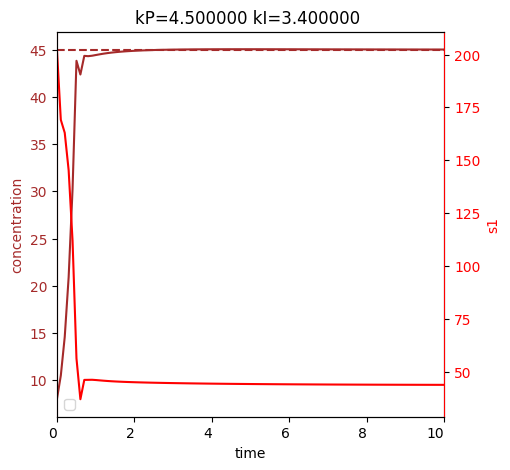

,kI,kD,kP,reason,score
0,3.4,0.0,4.5,Design successful.,42.924872
1,3.4,0.0,3.4,Design successful.,43.183923
2,4.5,0.0,4.5,Design successful.,43.327299
3,2.3,0.0,4.5,Design successful.,44.097512
4,2.3,0.0,3.4,Design successful.,44.296050
...,...,...,...,...,...
95,8.9,0.0,10.0,No design. Cannot simulate the closed loop sys...,NaN
96,5.6,0.0,7.8,No design. Cannot simulate the closed loop sys...,NaN
97,0.1,0.0,10.0,No design. Cannot simulate the closed loop sys...,NaN
98,4.5,0.0,6.7,No design. Cannot simulate the closed loop sys...,NaN


In [10]:
ctlsb = ctl.ControlSBML(URL, input_name="s1", output_name="s5")
result = ctlsb.plotDesign(setpoint=45, kP_spec=True, kI_spec=True, kD_spec=0,
    min_parameter_value=0.1, max_parameter_value=10,
    num_coordinate=10, times=np.linspace(0, 10, 100))
result.design_df

In [11]:
result.design_df

,kI,kD,kP,reason,score
0,3.4,0.0,4.5,Design successful.,42.924872
1,3.4,0.0,3.4,Design successful.,43.183923
2,4.5,0.0,4.5,Design successful.,43.327299
3,2.3,0.0,4.5,Design successful.,44.097512
4,2.3,0.0,3.4,Design successful.,44.296050
...,...,...,...,...,...
95,8.9,0.0,10.0,No design. Cannot simulate the closed loop sys...,NaN
96,5.6,0.0,7.8,No design. Cannot simulate the closed loop sys...,NaN
97,0.1,0.0,10.0,No design. Cannot simulate the closed loop sys...,NaN
98,4.5,0.0,6.7,No design. Cannot simulate the closed loop sys...,NaN


  0%|          | 0/100 [00:00<?, ?it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  1%|          | 1/100 [00:02<03:18,  2.01s/it]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0231825 and h = 4.54777e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0224609 and h = 9.79791e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  3%|▎         | 3/100 [00:02<01:03,  1.52it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.5608 and h = 9.95162e-17, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0151859 and h = 4.84711e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  5%|▌         | 5/100 [00:02<00:38,  2.44it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0245243 and h = 1.04186e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0224266 and h = 6.18794e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  7%|▋         | 7/100 [00:03<00:29,  3.11it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.022989 and h = 4.41912e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0226035 and h = 1.16881e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


  9%|▉         | 9/100 [00:03<00:24,  3.74it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0226812 and h = 2.43864e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0237196 and h = 2.577e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 11%|█         | 11/100 [00:03<00:21,  4.23it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 9.40489 and h = 5.10361e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0220725 and h = 4.31554e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 13%|█▎        | 13/100 [00:04<00:21,  4.08it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.030237 and h = 7.78252e-118, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 9.98126 and h = 1.42069e-14, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 15%|█▌        | 15/100 [00:05<00:23,  3.57it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0223334 and h = 2.33128e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0288666 and h = 9.82112e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 17%|█▋        | 17/100 [00:05<00:23,  3.54it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.82147 and h = 1.52308e-08, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0216813 and h = 2.2107e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 19%|█▉        | 19/100 [00:06<00:23,  3.48it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0225719 and h = 4.41699e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0222874 and h = 2.6819e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 21%|██        | 21/100 [00:06<00:22,  3.52it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0234849 and h = 3.10657e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0305045 and h = 3.64719e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 23%|██▎       | 23/100 [00:07<00:21,  3.62it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0233788 and h = 2.14546e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0677466 and h = 7.48071e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 25%|██▌       | 25/100 [00:07<00:21,  3.55it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.07949 and h = 2.07193e-14, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 4.27018 and h = 6.22104e-14, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 27%|██▋       | 27/100 [00:08<00:22,  3.23it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0225634 and h = 1.14733e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0264912 and h = 1.29318e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 29%|██▉       | 29/100 [00:09<00:23,  3.08it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0237046 and h = 2.02323e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0232606 and h = 9.2752e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 31%|███       | 31/100 [00:10<00:22,  3.09it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0218392 and h = 1.87922e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0233246 and h = 5.8077e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 33%|███▎      | 33/100 [00:10<00:21,  3.12it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0237841 and h = 9.20862e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.562586 and h = 4.37997e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 35%|███▌      | 35/100 [00:11<00:20,  3.12it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0209445 and h = 3.73145e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0989439 and h = 7.76009e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 37%|███▋      | 37/100 [00:11<00:17,  3.59it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.64832 and h = 1.97776e-08, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0308093 and h = 2.1402e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 39%|███▉      | 39/100 [00:12<00:15,  3.89it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.6853 and h = 1.82107e-08, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.62268 and h = 1.85525e-08, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 41%|████      | 41/100 [00:12<00:13,  4.24it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.78751 and h = 2.01259e-08, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.022597 and h = 1.06647e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 43%|████▎     | 43/100 [00:12<00:12,  4.54it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0232428 and h = 1.6299e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.69364 and h = 1.98753e-08, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 45%|████▌     | 45/100 [00:13<00:11,  4.59it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.64875 and h = 6.72107e-09, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.73022 and h = 8.63517e-09, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 47%|████▋     | 47/100 [00:13<00:11,  4.81it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0266483 and h = 6.61457e-116, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0246736 and h = 3.74241e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 49%|████▉     | 49/100 [00:13<00:10,  4.93it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0653593 and h = 1.77782e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0209468 and h = 6.85036e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 51%|█████     | 51/100 [00:14<00:09,  5.06it/s]

CVODE Error: CV_ERR_FAILURE: Error test failures occurred too many times (= MXNEF = 7) during one internal time step oroccurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0270084 and h = 5.73488e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0191111 and h = 3.17312e-19, the error test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 53%|█████▎    | 53/100 [00:14<00:09,  5.13it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.71807 and h = 1.96066e-08, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.022574 and h = 2.54521e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 55%|█████▌    | 55/100 [00:15<00:08,  5.19it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0228067 and h = 4.5489e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0229416 and h = 5.53106e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 57%|█████▋    | 57/100 [00:15<00:08,  5.24it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.022341 and h = 1.46647e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0230566 and h = 1.32883e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 59%|█████▉    | 59/100 [00:15<00:07,  5.25it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0342544 and h = 1.13137e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0139609 and h = 1.80581e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)



 61%|██████    | 61/100 [00:16<00:07,  5.07it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0204066 and h = 3.70611e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0222229 and h = 9.49757e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 63%|██████▎   | 63/100 [00:16<00:07,  5.20it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0211709 and h = 1.5929e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 65%|██████▌   | 65/100 [00:16<00:06,  5.32it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 4.22988 and h = 6.57846e-14, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0221438 and h = 1.05513e-116, the corrector convergence test failed repeatedly or with |h| = hmin.
 67%|██████▋   | 67/100 [00:17<00:06,  5.30it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0226748 and h = 1.25835e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 69%|██████▉   | 69/100 [00:17<00:05,  5.38it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 4.64403 and h = 2.04952e-15, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0194394 and h = 3.58265e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 71%|███████   | 71/100 [00:18<00:05,  5.10it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0745199 and h = 3.99067e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.64854 and h = 1.95279e-08, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 73%|███████▎  | 73/100 [00:18<00:05,  5.21it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0223001 and h = 1.49348e-116, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0268267 and h = 6.7506e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 75%|███████▌  | 75/100 [00:18<00:04,  5.19it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0205178 and h = 2.92887e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0643503 and h = 4.33802e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 77%|███████▋  | 77/100 [00:19<00:04,  5.05it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0175836 and h = 4.82764e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0215303 and h = 1.94776e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 79%|███████▉  | 79/100 [00:19<00:04,  5.24it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0236779 and h = 7.73613e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.38961 and h = 2.7921e-19, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 81%|████████  | 81/100 [00:20<00:03,  5.36it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0227586 and h = 3.22519e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0251141 and h = 5.87827e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 83%|████████▎ | 83/100 [00:20<00:03,  5.38it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0304927 and h = 8.12211e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0197659 and h = 1.31193e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 85%|████████▌ | 85/100 [00:20<00:02,  5.42it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.021451 and h = 6.54014e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0187263 and h = 4.14081e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 87%|████████▋ | 87/100 [00:21<00:02,  5.31it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0228593 and h = 3.26796e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0769306 and h = 4.62455e-116, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 89%|████████▉ | 89/100 [00:21<00:02,  4.91it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0162357 and h = 1.43914e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.10264 and h = 2.01612e-17, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0229796 and h = 1.24965e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 91%|█████████ | 91/100 [00:22<00:02,  3.93it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.067018 and h = 9.37167e-118, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0210611 and h = 3.77772e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 93%|█████████▎| 93/100 [00:23<00:02,  3.21it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0228547 and h = 4.00751e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.021126 and h = 2.42249e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 95%|█████████▌| 95/100 [00:23<00:01,  3.33it/s]

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.023663 and h = 1.16347e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0225416 and h = 1.41799e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


 97%|█████████▋| 97/100 [00:24<00:00,  3.19it/s]Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 5.14828 and h = 3.60903e-17, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0229987 and h = 2.7329e-117, the corrector convergence test failed repeatedly or with |h| = hmin.


CVODE Error: CV_ERR_FAILURE: Error test failures occurred too many times (= MXNEF = 7) during one internal time step oroccurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]
Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0174806 and h = 1.05444e-17, the error test failed repeatedly or with |h| = hmin.


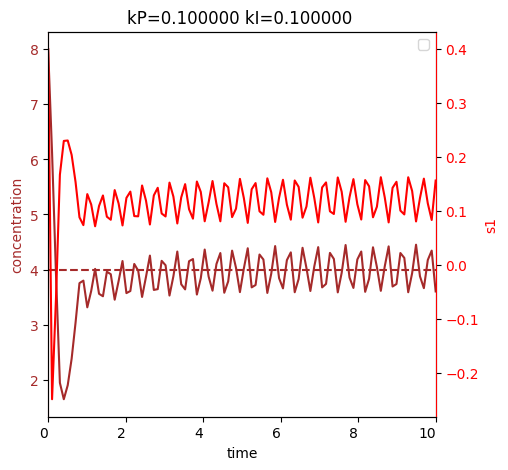

,kI,kD,kP,reason,score
0,0.1,0.0,0.1,Design successful.,4.694223e-01
1,4.5,0.0,2.3,Design successful.,9.237823e+34
2,5.6,0.0,6.7,No design. Cannot simulate the closed loop sys...,NaN
3,8.9,0.0,0.1,No design. Cannot simulate the closed loop sys...,NaN
4,5.6,0.0,3.4,No design. Cannot simulate the closed loop sys...,NaN
...,...,...,...,...,...
95,0.1,0.0,4.5,No design. Cannot simulate the closed loop sys...,NaN
96,2.3,0.0,8.9,No design. Cannot simulate the closed loop sys...,NaN
97,10.0,0.0,4.5,No design. Cannot simulate the closed loop sys...,NaN
98,1.2,0.0,0.1,No design. Cannot simulate the closed loop sys...,NaN


In [12]:
result = CTLSB.plotDesign(setpoint=4, kP_spec=True, kI_spec=True, kD_spec=0,
    min_parameter_value=0.1, max_parameter_value=10,
    num_coordinate=10,
                            times=np.linspace(0, 10, 100))
result.design_df

# 4. Evaluate the control design

Discuss how well you were able to achieve your control objectives.